# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Partahi Bonaruli Sitorus
- **Email:** bonaruli42@gmail.com
- **ID Dicoding:** Bonar Sitorus

## Menentukan Pertanyaan Bisnis

- Bagaimana pola/tren jumlah perentalan sepeda?
- Pada Kondisi apa saja terjadi peningkatan jumlah rental sepeda?
- Bagaimana hubungan cuaca terhadap jumlah rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Data Wrangling

### Gathering Data

In [133]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [134]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight**
- Pada proyek ini menggunakan 2 tabel yang memuat kondisi cuaca dan jumlah sepeda yang di rentalkan pada waktu - waktu tertentu
- Masing - masing tabel terdiri dari 16 dan 17 kolom
- Tabel day_df merupakan data yang diambil dalam rentang waktu harian
- Tabel hour_df merupakan data yang diambil dalam rentang waktu tiap jam dalam satu hari

### Assesing Data

#### Assesing day_df data

In [135]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [136]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [137]:
day_df.duplicated().sum()

np.int64(0)

In [138]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [139]:
for col in day_df.columns:
    print("Kolom {:^13} memiliki {:^5} unique value".format(col.upper(), day_df[col].nunique()))


Kolom    INSTANT    memiliki  731  unique value
Kolom    DTEDAY     memiliki  731  unique value
Kolom    SEASON     memiliki   4   unique value
Kolom      YR       memiliki   2   unique value
Kolom     MNTH      memiliki  12   unique value
Kolom    HOLIDAY    memiliki   2   unique value
Kolom    WEEKDAY    memiliki   7   unique value
Kolom  WORKINGDAY   memiliki   2   unique value
Kolom  WEATHERSIT   memiliki   3   unique value
Kolom     TEMP      memiliki  499  unique value
Kolom     ATEMP     memiliki  690  unique value
Kolom      HUM      memiliki  595  unique value
Kolom   WINDSPEED   memiliki  650  unique value
Kolom    CASUAL     memiliki  606  unique value
Kolom  REGISTERED   memiliki  679  unique value
Kolom      CNT      memiliki  696  unique value


Kolom season, yr, mnth, holiday, weekday, workingday, weathersit adalah kolom dengan data nominal yang di tuliskan dengan data numerik

In [140]:
for col in day_df.columns[2:9]:
    if col == "mnth" or col == "weekday":
        continue
    print(day_df[col].value_counts())

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64
yr
1    366
0    365
Name: count, dtype: int64
holiday
0    710
1     21
Name: count, dtype: int64
workingday
1    500
0    231
Name: count, dtype: int64
weathersit
1    463
2    247
3     21
Name: count, dtype: int64


#### Assesing hour_df data

In [141]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [142]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [143]:
hour_df.duplicated().sum()

np.int64(0)

In [144]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kolom season, yr, mnth, hr, holiday, weekday, workingday, weathersit adalah kolom dengan data nominal yang di tuliskan dengan data numerik

In [145]:
for col in hour_df.columns[2:10]:
    if col == "mnth" or col == "weekday" or col == "hr":
        continue
    print(hour_df[col].value_counts())

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64
yr
1    8734
0    8645
Name: count, dtype: int64
holiday
0    16879
1      500
Name: count, dtype: int64
workingday
1    11865
0     5514
Name: count, dtype: int64
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


**Insight**
- Tabel day_df dan hour_df tidak memiliki missing value, duplicated data, atau inconsistency data
- Data pada kedua tabel ini hanya perlu perubahan tipe data pada kolom yang berisi tanggal, setelahnya data bisa digunakan
- Secara garis besar data pada kedua tabel ini berupa data numerikal dan data nominal

### Cleaning Data

In [146]:
day_df["dteday"] = pd.to_datetime(day_df['dteday'])
hour_df["dteday"] = pd.to_datetime(hour_df['dteday'])

In [147]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [148]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## **Insight Data Wrangling**
- Telah dilakukan perubahan tipe data pada kolom yang memuat tanggal pada tabel day_df dan hour_df, setelah ini kolom tersebut bisa dikenai operasi perhitungan waktu
- Data yang didapat tidak memiliki missing value, inconsistency, atau duplicated value

## Exploratory Data Analysis (EDA)

### Explore

#### Analisis Hubungan tabel day_df dan hour_df

In [149]:
#kita mengambil beberapa sample dari day_df
sample_df = day_df.sample(n= 10, random_state= 42)
sample_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
703,704,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,6055,6606
33,34,2011-02-03,1,0,2,0,4,1,1,0.186957,0.177878,0.437826,0.277752,61,1489,1550
300,301,2011-10-28,4,0,10,0,5,1,2,0.330833,0.318812,0.585833,0.229479,456,3291,3747
456,457,2012-04-01,2,1,4,0,0,0,2,0.425833,0.417287,0.676250,0.172267,2347,3694,6041
633,634,2012-09-25,4,1,9,0,2,1,1,0.550000,0.544179,0.570000,0.236321,845,6693,7538
557,558,2012-07-11,3,1,7,0,3,1,1,0.716667,0.650271,0.633333,0.151733,975,6289,7264
39,40,2011-02-09,1,0,2,0,3,1,2,0.134783,0.144283,0.494783,0.188839,53,1552,1605
356,357,2011-12-23,1,0,12,0,5,1,1,0.373333,0.377513,0.686250,0.274246,163,2046,2209
559,560,2012-07-13,3,1,7,0,5,1,2,0.731667,0.667933,0.485833,0.080850,1511,5988,7499
514,515,2012-05-29,2,1,5,0,2,1,1,0.722500,0.672992,0.684583,0.295400,880,4863,5743


In [150]:
#kita mengambil sample dari hour_df dengan tanggal yang sama pada sample dari day_df (tabel sample_df)
sample_hour_df = pd.DataFrame()
for date in sample_df['dteday']:
    temp_sample_hour_df = hour_df[hour_df['dteday'] == date]
    sample_hour_df = pd.concat([sample_hour_df, temp_sample_hour_df], ignore_index = False)
sample_hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16709,16710,2012-12-04,4,1,12,0,0,2,1,1,0.42,0.4242,0.88,0.1045,6,49,55
16710,16711,2012-12-04,4,1,12,1,0,2,1,1,0.42,0.4242,0.82,0.1045,3,22,25
16711,16712,2012-12-04,4,1,12,2,0,2,1,1,0.42,0.4242,0.88,0.0896,3,5,8
16712,16713,2012-12-04,4,1,12,3,0,2,1,2,0.40,0.4091,0.87,0.1343,1,3,4
16713,16714,2012-12-04,4,1,12,4,0,2,1,2,0.40,0.4091,0.87,0.1343,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12230,12231,2012-05-29,2,1,5,19,0,2,1,1,0.78,0.7121,0.52,0.3582,69,457,526
12231,12232,2012-05-29,2,1,5,20,0,2,1,3,0.70,0.6515,0.61,0.5224,36,168,204
12232,12233,2012-05-29,2,1,5,21,0,2,1,3,0.60,0.5455,0.88,0.4478,3,68,71
12233,12234,2012-05-29,2,1,5,22,0,2,1,2,0.62,0.5606,0.88,0.0896,2,53,55


In [151]:
#Lakukan grouping berdasarkan tanggal pada sample dari table hour_df (tabel sample_hour_df)
sample_day_df = sample_hour_df.groupby(by='dteday').agg({
    "temp": "mean",
    "atemp": "mean",
    "hum" : "mean",
    "windspeed" : "mean",
    "cnt" : "sum"
})
sample_day_df

,temp,atemp,hum,windspeed,cnt
dteday,,,,,
2011-02-03,0.186957,0.177878,0.437826,0.277752,1550
2011-02-09,0.134783,0.144283,0.494783,0.188839,1605
2011-10-28,0.330833,0.318812,0.585833,0.229479,3747
2011-12-23,0.373333,0.377512,0.686250,0.274246,2209
2012-04-01,0.425833,0.417288,0.676250,0.172267,6041
2012-05-29,0.722500,0.672992,0.684583,0.295400,5743
2012-07-11,0.716667,0.650271,0.633333,0.151733,7264
2012-07-13,0.731667,0.667933,0.485833,0.080850,7499
2012-09-25,0.550000,0.544179,0.570000,0.236321,7538


In [152]:
sample_df.sort_values(by= 'dteday', ascending= True)[['dteday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

,dteday,temp,atemp,hum,windspeed,cnt
33,2011-02-03,0.186957,0.177878,0.437826,0.277752,1550
39,2011-02-09,0.134783,0.144283,0.494783,0.188839,1605
300,2011-10-28,0.330833,0.318812,0.585833,0.229479,3747
356,2011-12-23,0.373333,0.377513,0.686250,0.274246,2209
456,2012-04-01,0.425833,0.417287,0.676250,0.172267,6041
514,2012-05-29,0.722500,0.672992,0.684583,0.295400,5743
557,2012-07-11,0.716667,0.650271,0.633333,0.151733,7264
559,2012-07-13,0.731667,0.667933,0.485833,0.080850,7499
633,2012-09-25,0.550000,0.544179,0.570000,0.236321,7538
703,2012-12-04,0.475833,0.469054,0.733750,0.174129,6606


Dapat dilihat bahwa tabel day_df merupakan penggabungan dari hour_df pada tanggal yang sama

#### Analisis tren jumlah penggunaan sepeda mingguan

In [153]:
day_df[day_df["workingday"] == 1].describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,500.000000,500,500.000000,500.000000,500.00000,500.0,500.000000,500.0,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,365.378000,2011-12-31 09:04:19.200000256,2.506000,0.500000,6.50600,0.0,3.046000,1.0,1.41800,0.501932,0.480130,0.630248,0.189497,606.570000,3978.250000,4584.820000
min,3.000000,2011-01-03 00:00:00,1.000000,0.000000,1.00000,0.0,1.000000,1.0,1.00000,0.097391,0.117930,0.000000,0.022392,2.000000,20.000000,22.000000
25%,181.750000,2011-06-30 18:00:00,2.000000,0.000000,4.00000,0.0,2.000000,1.0,1.00000,0.344094,0.342094,0.530833,0.134177,251.500000,3107.000000,3344.250000
50%,366.000000,2012-01-01 00:00:00,3.000000,0.500000,6.50000,0.0,3.000000,1.0,1.00000,0.514167,0.503144,0.631250,0.176937,616.500000,3866.000000,4582.000000
75%,546.750000,2012-06-29 18:00:00,3.000000,1.000000,9.00000,0.0,4.000000,1.0,2.00000,0.654375,0.607015,0.729271,0.234620,872.750000,5183.250000,5987.500000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.00000,0.0,5.000000,1.0,3.00000,0.848333,0.840896,0.972500,0.441563,2469.000000,6946.000000,8362.000000
std,210.737048,NaN,1.102904,0.500501,3.42014,0.0,1.395629,0.0,0.55488,0.180876,0.160542,0.141287,0.077233,391.496032,1568.692453,1878.415583


In [154]:
day_df[(day_df["workingday"] == 0)].describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,231.000000,231,231.000000,231.000000,231.000000,231.000000,231.000000,231.0,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,367.346320,2012-01-02 08:18:42.077922048,2.476190,0.502165,6.549784,0.090909,2.891775,0.0,1.346320,0.481213,0.461852,0.622800,0.192628,1371.134199,2959.034632,4330.168831
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.059130,0.079070,0.187917,0.042304,54.000000,451.000000,605.000000
25%,184.500000,2011-07-03 12:00:00,1.000000,0.000000,4.000000,0.000000,0.000000,0.0,1.000000,0.325833,0.325117,0.507228,0.139927,607.500000,2076.000000,2710.500000
50%,366.000000,2012-01-01 00:00:00,2.000000,1.000000,7.000000,0.000000,1.000000,0.0,1.000000,0.463333,0.456429,0.615833,0.186562,1338.000000,2928.000000,4459.000000
75%,549.500000,2012-07-02 12:00:00,3.000000,1.000000,10.000000,0.000000,6.000000,0.0,2.000000,0.659583,0.613652,0.732708,0.230409,2133.500000,3920.000000,5907.500000
max,730.000000,2012-12-30 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,0.0,3.000000,0.861667,0.804913,0.948261,0.507463,3410.000000,5966.000000,8714.000000
std,212.543359,NaN,1.129869,0.501081,3.527025,0.288104,2.917931,0.0,0.520428,0.187285,0.167750,0.145050,0.078194,873.064794,1293.867686,2052.141245


Mean jumlah sepeda yang dipinjam pada hari kerja (workingday == 1) dan bukan hari kerja (workingday == 0) tidak berbeda jauh tetapi lebih unggul pada hari kerja

In [155]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [156]:
weekly_df = day_df.groupby([pd.Grouper(key= 'dteday', freq= "W"), "workingday"]).agg({
    "cnt":["sum", "mean", "median"]
})

In [157]:
weekly_df.head()

cnt                
                        sum    mean  median
dteday     workingday                      
2011-01-02 0           1786   893.0   893.0
2011-01-09 0           1781   890.5   890.5
           1           7627  1525.4  1562.0
2011-01-16 0           2452  1226.0  1226.0
           1           6573  1314.6  1321.0

In [158]:
weekly_df.reset_index(inplace= True)

In [159]:
weekly_df.columns.to_flat_index()
weekly_df.columns = ['_'.join(col).strip() for col in weekly_df.columns.values]

Index dan Column bernilai multiindex, maka perlu dilakukan flatten agar menjadi 1 level

In [160]:
weekly_df.head()

,dteday_,workingday_,cnt_sum,cnt_mean,cnt_median
0,2011-01-02,0,1786,893.0,893.0
1,2011-01-09,0,1781,890.5,890.5
2,2011-01-09,1,7627,1525.4,1562.0
3,2011-01-16,0,2452,1226.0,1226.0
4,2011-01-16,1,6573,1314.6,1321.0


In [161]:
weekly_df.tail()

,dteday_,workingday_,cnt_sum,cnt_mean,cnt_median
205,2012-12-23,0,3536,1768.000000,1768.0
206,2012-12-23,1,23160,4632.000000,4585.0
207,2012-12-30,0,4150,1383.333333,1341.0
208,2012-12-30,1,6570,1642.500000,1517.0
209,2013-01-06,1,2729,2729.000000,2729.0


In [162]:
weekly_df.drop(weekly_df.index[[0,-1]], inplace= True)

Index pertama dan terakhir dari tabel weekly_df kurang bernilai karena tidak berisi hari-hari dalam satu minggu penuh, maka bisa kita hapuskan

Setelah data diproses dan dikelompokkan perminggu, perbedaan rerata penggunaan sepeda pada hari kerja dan bukan hari kerja semakin terlihat. dapat disimpulkan bahwa penggunaan sepeda lebih banyak dilakukan pada hari kerja

#### Analisis jam pada jumlah penggunaan sepeda

In [163]:
hour_in_day_df = hour_df.groupby(by= ['workingday', 'hr']).agg({
    "cnt":["sum", "mean", "median", "min", "max"]
}).reset_index()
hour_in_day_df.columns = ["_".join(col).strip() for col in hour_in_day_df.columns.values]

In [164]:
hour_in_day_df

,workingday_,hr_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
0,0,0,20884,90.800000,93.5,6,249
1,0,1,15987,69.508696,71.0,4,168
2,0,2,12123,53.171053,54.0,2,132
3,0,3,5851,25.775330,25.0,2,79
4,0,4,1876,8.264317,7.0,1,28
5,0,5,1929,8.689189,7.0,1,55
6,0,6,4292,18.742358,16.0,1,133
7,0,7,10027,43.406926,39.0,1,387
8,0,8,24406,105.653680,94.0,5,597
9,0,9,39645,171.623377,170.0,14,397


In [165]:
hour_in_day_df[hour_in_day_df['workingday_'] == 0].nlargest(3, 'cnt_mean')

,workingday_,hr_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
13,0,13,86101,372.731602,367.0,30,760
12,0,12,84606,366.259740,367.0,32,776
14,0,14,84233,364.645022,361.0,23,750


In [166]:
hour_in_day_df[hour_in_day_df['workingday_'] == 1].nlargest(3, 'cnt_mean')

,workingday_,hr_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
41,1,17,262120,525.290581,539.0,26,976
42,1,18,245129,492.226908,504.5,26,977
32,1,8,236595,477.006048,463.0,31,839


- Penggunaan sepeda terbanyak pada hari kerja terdapat pada sore hari (pukul 17 dan 18) dan pagi hari (pukul 8)
- Penggunaan sepeda terbanyak pada bukan hari kerja terdapat pada siang hari (pukul 12, 13, 14)c

In [167]:
hour_in_day_df[hour_in_day_df['workingday_'] == 0].nsmallest(3, 'cnt_mean')

,workingday_,hr_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
4,0,4,1876,8.264317,7.0,1,28
5,0,5,1929,8.689189,7.0,1,55
6,0,6,4292,18.742358,16.0,1,133


In [168]:
hour_in_day_df[hour_in_day_df['workingday_'] == 1].nsmallest(3, 'cnt_mean')

,workingday_,hr_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
27,1,3,2323,4.942553,4.0,1,36
28,1,4,2552,5.429787,5.0,1,17
26,1,2,4229,8.683778,7.0,1,74


- Penggunaan sepeda paling sedikit pada hari kerja terdapat pada dini hari (pukul 2, 3, 4)
- Penggunaan sepeda paling sedikit pada bukan hari kerja terdapat pada pagi hari (pukul 4, 5, 6)

#### Analisis tren bulanan

In [169]:
monthly_df = day_df.groupby(by= ["yr","mnth"]).agg({
    "cnt":["sum","mean", "median", "min", "max"]
}).reset_index()
monthly_df.columns = ["_".join(col).strip() for col in monthly_df.columns.values]

In [170]:
monthly_df

,yr_,mnth_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
0,0,1,38189,1231.903226,1248.0,431,1985
1,0,2,48215,1721.964286,1629.0,1005,2927
2,0,3,64045,2065.967742,2077.0,605,3239
3,0,4,94870,3162.333333,3226.5,795,5312
4,0,5,135821,4381.322581,4451.0,2633,5805
5,0,6,143512,4783.733333,4839.5,3767,5515
6,0,7,141341,4559.387097,4541.0,3285,6043
7,0,8,136691,4409.387097,4602.0,1115,5895
8,0,9,127418,4247.266667,4584.5,1842,5423
9,0,10,123511,3984.225806,4304.0,627,5511


In [171]:
seasonal_df = day_df.groupby(by= ["yr","season"]).agg({
    "cnt":["sum","mean", "median", "min", "max"]
}).reset_index()

seasonal_df.columns = ["_".join(col).strip() for col in seasonal_df.columns.values]

seasonal_df["yr_"] = seasonal_df['yr_'].replace({
    0: 2011,
    1: 2012
})

seasonal_df['season_'] = seasonal_df['season_'].replace({
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})

In [172]:
seasonal_df

,yr_,season_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
0,2011,Springer,150000,1666.666667,1602.5,431,3239
1,2011,Summer,347316,3775.173913,4085.5,795,5805
2,2011,Fall,419650,4464.361702,4615.5,1115,6043
3,2011,Winter,326137,3664.460674,3717.0,627,5511
4,2012,Springer,321348,3531.296703,3456.0,441,7836
5,2012,Summer,571273,6209.489130,6384.0,1027,8362
6,2012,Fall,641479,6824.244681,6941.5,4073,8714
7,2012,Winter,515476,5791.865169,5629.0,22,8555


- Dapat dilihat bahwa tiap bulan jumlah penggunaan sepeda semakin meningkat
- Tetapi terjadi penurunan penggunaan tiap bulan 10 hingga 12
- Penggunaan sepeda tertinggi terjadi pada fall season(3) (1:springer, 2:summer, 3:fall, 4:winter)

#### Analisis jumlah penggunaan sepeda terhadap cuaca

In [173]:
hour_df['weathersit'].value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [174]:
weather_cnt = hour_df.groupby(by= ['weathersit']).agg({
    "cnt": ["sum", "mean", "median", "min", "max"]
}).reset_index()
weather_cnt.columns = ["_".join(col).strip() for col in weather_cnt.columns.values]
weather_cnt["weathersit_"] = weather_cnt['weathersit_'].replace({
    1: "Cerah",
    2: "Berawan",
    3: "Hujan Ringan",
    4: "Hujan Lebat"
})

In [175]:
weather_cnt

,weathersit_,cnt_sum,cnt_mean,cnt_median,cnt_min,cnt_max
0,Cerah,2338173,204.869272,159.0,1,977
1,Berawan,795952,175.165493,133.0,1,957
2,Hujan Ringan,158331,111.579281,63.0,1,891
3,Hujan Lebat,223,74.333333,36.0,23,164


Dapat dilihat bahwa cuaca berdampak pada jumlah pengguna sepeda. orang-orang menggunakan sepeda paling banyak pada cuaca cerah (1), sedangkan paling sedikit menggunakan sepeda pada cuaca hujan lebat(4). (1 = cerah, 2 = berkabut + berawan, 3 = Hujan ringan, 4 = Hujan lebat)

## **Insight Exploratory Data Analysis**
- Dapat dilihat bahwa tabel day_df merupakan penggabungan dari hour_df pada tanggal yang sama
- Pada tahun 2011 hingga 2012 terjadi tren peningkatan jumlah pengguna sepeda
- Jam kerja, hari kerja, bulan, ,musim, dan cuaca berpengaruh pada jumlah penggunaan sepeda

## Visualization & Explanatory Analysis

### Bagaimana pola/tren jumlah perentalan sepeda?

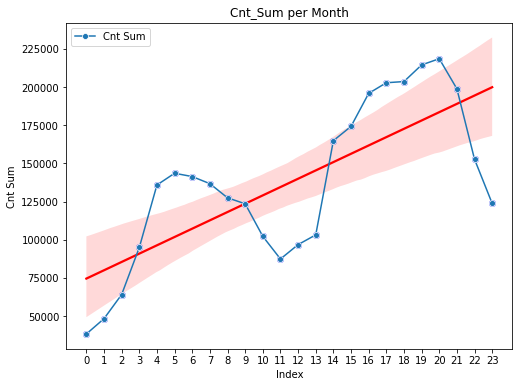

In [176]:
plt.figure(figsize=(8,6))
sns.regplot(x=monthly_df.index, y=monthly_df['cnt_sum'], marker='o', color='b', line_kws={"color":"red"})
sns.lineplot(x=monthly_df.index, y=monthly_df['cnt_sum'], marker='o', label='Cnt Sum')

plt.title('Cnt_Sum per Month')
plt.xlabel('Index')
plt.ylabel('Cnt Sum')
plt.xticks(ticks=monthly_df.index)

plt.show()

Terlihat bahwa jumlah penggunaan sepeda meningkat dari awal tahun 2011 hingga pada akhir 2012

### Pada Kondisi apa saja terjadi peningkatan jumlah rental sepeda?


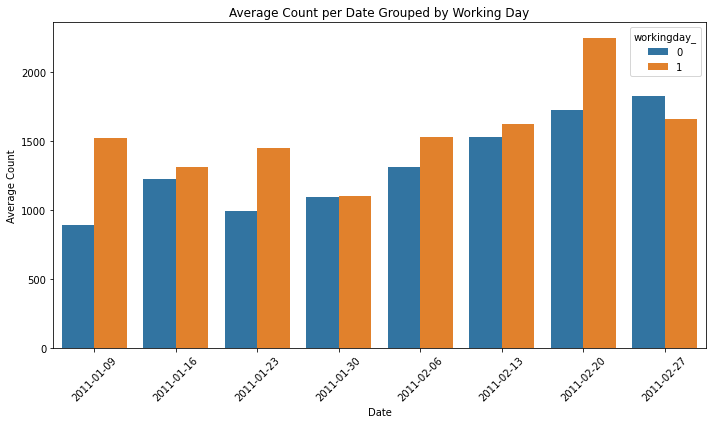

In [177]:
plt.figure(figsize=(10,6))
sns.barplot(x="dteday_", y='cnt_mean', hue='workingday_', data=weekly_df[:16]) # nilai slicing data dengan kelipatan 16 untuk melihat data lain pada rentang 2 bulanan

plt.title('Average Count per Date Grouped by Working Day')
plt.xlabel('Date')
plt.ylabel('Average Count')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Terlihat bahwa penggunaan sepeda cenderung lebih banyak pada hari kerja

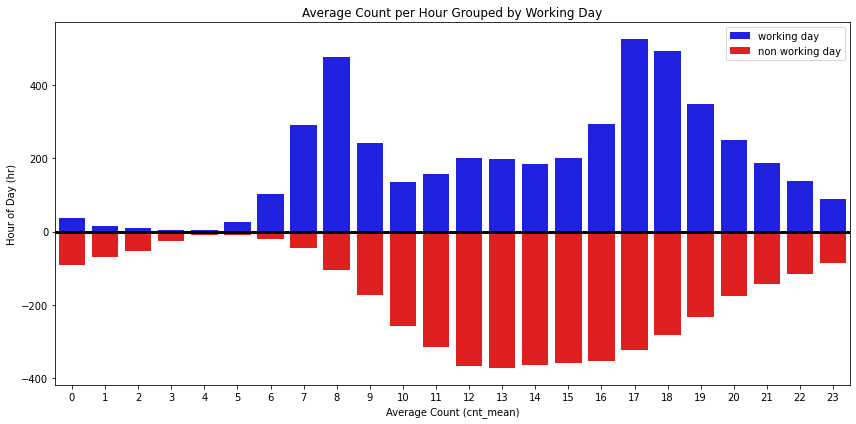

In [178]:
workingday_1 = hour_in_day_df[hour_in_day_df["workingday_"] == 1]
workingday_0 = hour_in_day_df[hour_in_day_df["workingday_"] == 0]

plt.figure(figsize=(12, 6))

sns.barplot(x = workingday_1["hr_"], y = workingday_1["cnt_mean"], color= "blue", label = "working day")
sns.barplot(x = workingday_0["hr_"], y = -workingday_0["cnt_mean"], color= "red", label = "non working day")

plt.title('Average Count per Hour Grouped by Working Day')
plt.xlabel('Average Count (cnt_mean)')
plt.ylabel('Hour of Day (hr)')
plt.axhline(0, color='black', linewidth=3)  # Garis tengah

plt.tight_layout()
plt.show()

Terlihat bahwa penggunaan sepeda cenderung meningkat pesat pada jam-jam tertentu, dan jam tertentu ini berbeda pada hari kerja dan bukan hari kerja

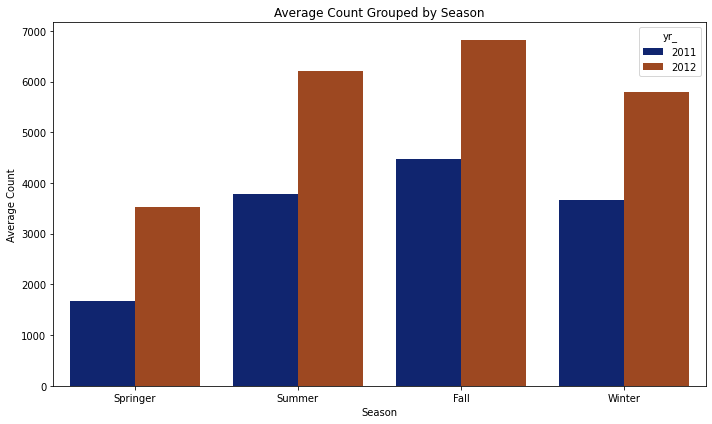

In [179]:
plt.figure(figsize=(10,6))
sns.barplot(x="season_", y='cnt_mean', hue='yr_', data=seasonal_df, palette='dark') 
plt.title('Average Count Grouped by Season')
plt.xlabel('Season')
plt.ylabel('Average Count')

plt.tight_layout()
plt.show()

Terlihat bahwa penggunaan sepeda paling sedikit terjadi pada springer season

### Bagaimana hubungan cuaca terhadap jumlah rental sepeda?

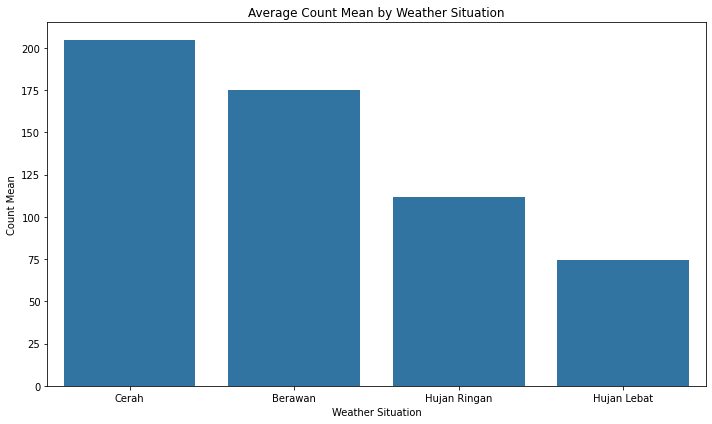

In [180]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit_', y='cnt_mean', data=weather_cnt)

plt.title('Average Count Mean by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Count Mean')

plt.tight_layout()
plt.show()

Terlihat bahwa cuaca mempengaruhi jumlah penggunaan sepeda, jumlah penggunaan sepeda tertinggi terjadi saat cuaca cerah atau sedikit berawan

## Analisis Lanjutan

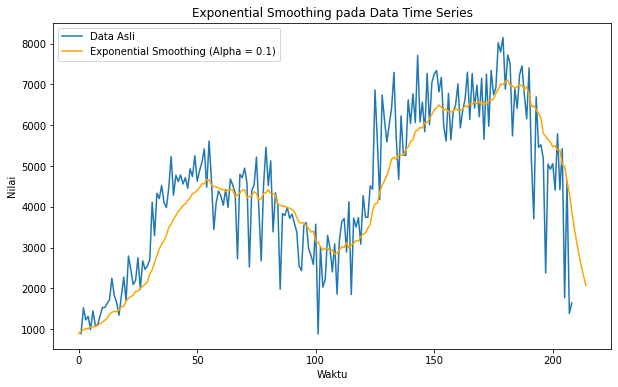

In [181]:
def exponential_smoothing(data,alpha):
    smoothed_data = np.zeros(len(data) + 7) #ditambahkan 7 agar memberikan prediksi untuk 7 minggu kedepan
    data = data.tolist() + np.zeros(7).tolist()
    smoothed_data[0] = data[0]  #nilai pertama menggunakan nilai dari data asli
    for t in range(1, len(data)):
        smoothed_data[t] = (alpha * data[t]) + ((1 - alpha) * smoothed_data[t-1])
        data[t] = smoothed_data[t]
    return smoothed_data
alpha = 0.1
smoothed_data = exponential_smoothing(np.array(weekly_df['cnt_mean']), alpha)

plt.figure(figsize=(10, 6))
plt.plot(weekly_df['cnt_mean'], label='Data Asli')
plt.plot(smoothed_data, label=f'Exponential Smoothing (Alpha = {alpha})', color='orange')
plt.title('Exponential Smoothing pada Data Time Series')
plt.xlabel('Waktu')
plt.ylabel('Nilai')
plt.legend()
plt.show()


**Insight**

Tren penggunaan sepeda diperkirakan menurun pada akhir tahun 2012. Prediksi yang lakukan disini didasari oleh perhitungan Exponential Smoothing dengan nilai Alpha 0.1

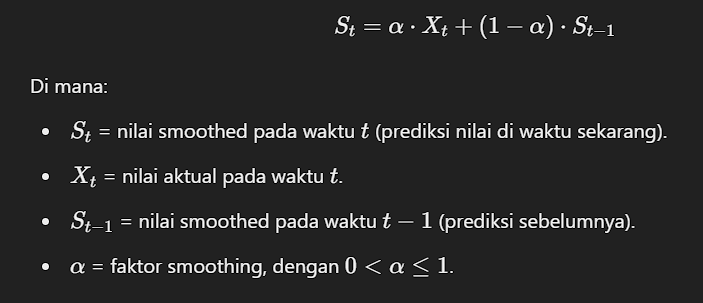

## Conclusion
Terdapat banyak faktor yang mempengaruhi peningkatan penggunaan sepeda, seperti jam, cuaca, dan musim. Namun, secara keseluruhan penggunaan sepeda telah meningkat sejak tahun 2011 hingga 2012 

Pertanyaan 1
> Tren penggunaan sepeda meningkat sejak awal tahun 2011 hingga tahun 2012, tetapi kembali menurun pada akhir 2012

Pertanyaan 2
> Penggunaan sepeda meningkat pada hari kerja, pada jam 8 dan 17 pada hari kerja, dan pada musim gugur (fall season)

Pertanyaan 3
> Cuaca sangat mempengaruhi jumlah perentalan sepeda, cuaca hujan sangat mengurangi jumlah penggunaan sepeda